# Ficha de Expressões Regulares 2

Autora: Sofia Santos

---

Cartoon relevante

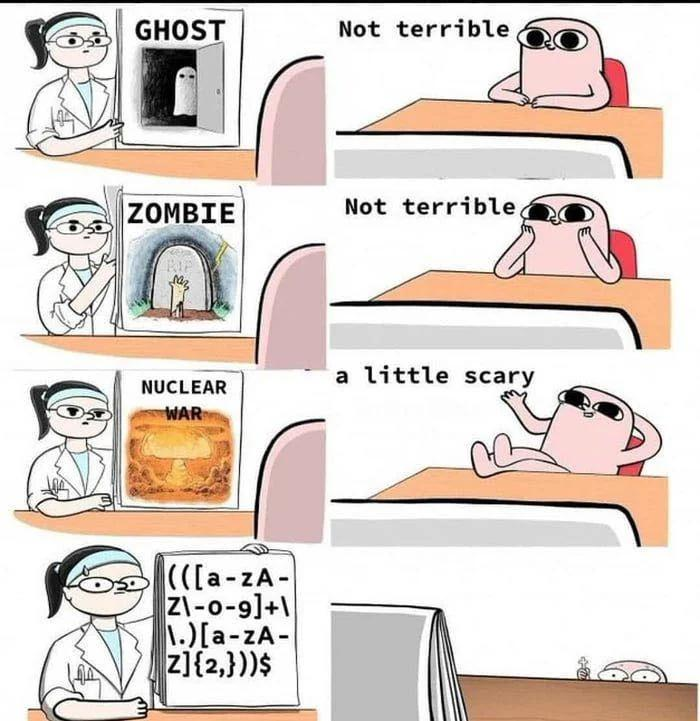

### Conceitos mais avançados de expressões regulares

- `\w` - corresponde a um caracter alfanumérico (a-z, A-Z, 0-9 ou _).
- `\W` - corresponde a um caracter **não** alfanumérico.
- `\s` - corresponde a um caracter de *whitespace* (' ', '\t', ou '\n', por exemplo).
- `\S` - corresponde a um caracter que não seja *whitespace*.
- `\d` - corresponde a um dígito.
- `\D` - corresponde a um caracter que não seja um dígito.
- `\btot\w+` - corresponde a uma palavra **começada** por "tot" (o token `\b` representa uma *word boundary*, ou seja, o limite entre um caracter alfanumérico e um não alfanumérico). Por exemplo, esta expressão regular captura a palavra "totalidade" mas não a palavra "batota". O token `\b` também pode ser usado no fim de palavras.
- `a(?=b)` - corresponde a um caracter `a` que tenha à sua frente um caracter `b`, mas não captura o caracter `b`. (*positive lookahead*)
- `a(?!b)` - corresponde a um caracter `a` que **não** tenha à sua frente um caracter `b`, mas não captura o caracter seguinte. (*negative lookahead*)
- `(?<=b)a` - corresponde a um caracter `a` que tenha atrás de si um caracter `b`, mas não captura o caracter `b`. (*positive lookbehind*)
- `(?<!b)a` - corresponde a um caracter `a` que **não** tenha atrás de si um caracter `b`, mas não captura o caracter anterior. (*negative lookbehind*)


Podemos usar *grupos de captura* em expressões regulares para isolar segmentos da string capturada. Usamos parênteses para definir grupos de captura.

In [ ]:
import re
m = re.search(r'(2[0-3]|[0-1][0-9]):([0-5][0-9])', "13:49")

print(m.groups()) # conjunto dos grupos de captura
print(m.group(0)) # toda a string capturada
print(m.group(1)) # o primeiro grupo de captura

Na função `re.sub`, podemos usar a sintaxe `\N`, em que `N` é um número positivo, para nos referirmos ao n-ésimo grupo de captura.

In [ ]:
coords = "(1,2) (5,8) (-2,3)"

print(re.sub(r"\((-?\d+),(-?\d+)\)", r"(\2,\1)", coords))

Ao colocar o prefixo `?:` num grupo, este deixa de ser um grupo de captura. Por exemplo, `(?:a|b|c)`. Isto é útil para funções como `re.findall`, em que, havendo pelo menos um grupo de captura na expressão regular, apenas a correspondência do grupo é devolvida.

In [ ]:
print(re.findall(r"\d(\d)\d", "123 456 789"))
print(re.findall(r"\d(?:\d)\d", "123 456 789"))

Por defeito, os operadores `*` e `+` são gananciosos (*greedy*). Podemos, através do operador `?`, torná-los preguiçosos (*lazy*). Segue-se um exemplo:

In [ ]:
import re

pal = "banana"

m_greedy = re.search(r'ba.*a', pal)
m_lazy = re.search(r'ba.*?a', pal)

print(m_greedy.group(0)) # banana
print(m_lazy.group(0)) # bana

banana
bana


## Exercício 1 - Conversão de datas

Define a função `iso_8601` que converte as datas presentes numa string no formato DD/MM/AAAA para o formato ISO 8601 - AAAA-MM-DD, usando expressões regulares e grupos de captura.

In [ ]:
texto = """A 03/01/2022, V foi de férias com a sua família.
Ficaram hospedados num hotel e aproveitaram as férias para passear e descobrir novos locais.
Mais tarde, no dia 12/01/2022, V voltou para casa e começou a trabalhar num novo projeto.
Passou muitas horas no computador, mas finalmente terminou o projeto a 15/01/2022.

Alguns meses depois, a 26/09/2023, V casou-se com Judy e no dia 30/09/2023 partiram na
sua lua-de-mel para o local onde V tinha ido de férias no ano anterior."""

re.sub(r"(\d\d)/(\d{2})/(\d{4})", r"\3-\2-\1", texto)
# ...

'A 2022-01-03, V foi de férias com a sua família.\nFicaram hospedados num hotel e aproveitaram as férias para passear e descobrir novos locais.\nMais tarde, no dia 2022-01-12, V voltou para casa e começou a trabalhar num novo projeto.\nPassou muitas horas no computador, mas finalmente terminou o projeto a 2022-01-15.\n\nAlguns meses depois, a 2023-09-26, V casou-se com Judy e no dia 2023-09-30 partiram na\nsua lua-de-mel para o local onde V tinha ido de férias no ano anterior.'

## Exercício 2 - Validação de ficheiros

Escreve um programa que lê uma lista de nomes de ficheiros e determina se cada nome é válido ou não. O nome de um ficheiro deve conter apenas caracteres alfanuméricos, hífens, underscores ou pontos, seguido de uma extensão (e.g., ".txt", ".png", etc.).

In [ ]:
file_names = [
  "document.txt", # válido
  "file name.docx", # inválido
  "image_001.jpg", # válido
  "script.sh.txt", # válido
  "test_file.txt", # válido
  "file_name.", # inválido
  "my_resume.docx", # válido
  ".hidden-file.txt", # válido
  "important-file.text file", # inválido
  "file%name.jpg" # inválido
]

# ...

### Alínea 2.1

Modifica o programa anterior para colocar os nomes de ficheiro válidos num dicionário, no qual as chaves deverão ser as extensões dos mesmos. Por outras palavras, agrupa os ficheiros por extensão.

## Exercício 3 - Conversão de nomes

Escreve um filtro de texto que converte cada **nome completo** de uma pessoa encontrada num texto fonte, no formato `PrimeiroNome SegundoNome [...] UltimoNome` para o formato `UltimoNome, PrimeiroNome`. Por exemplo, "Rui Vieira de Castro" passa a "Castro, Rui". Atenção aos conectores "de", "dos", etc.

In [ ]:
import re

texto = """Este texto foi feito por Sofia Guilherme Rodrigues dos Santos, com
base no texto original de Pedro Rafael Paiva Moura, com a ajuda
do professor Pedro Rangel Henriques e do professor José João Antunes Guimarães
Dias De Almeida.
Apesar de partilharem o mesmo apelido, a Sofia não é da mesma família do famoso
autor José Rodrigues dos Santos."""

def replace(m) :
  return f"{m.group(2)}, {m.group(1)}"


r = re.sub(r"([A-Z][a-zéáãóõ]+)\s(?:(?:[A-Z][a-zéáãóõ]+|dos|do|de)\s)*([A-Z][a-zéáãóõ]+)", replace, texto)
print(r)

# ...

Este texto foi feito por Santos, Sofia, com
base no texto original de Moura, Pedro, com a ajuda
do professor Henriques, Pedro e do professor Almeida, José.
Apesar de partilharem o mesmo apelido, a Sofia não é da mesma família do famoso
autor Santos, José.


## Exercício 4 - Códigos postais 2

Define uma função `codigos_postais` que recebe uma lista de códigos postais e divide-os com base no hífen. Ao contrário do exercício da ficha anterior, esta função pode receber códigos postais inválidos. A função deve devolver uma lista de pares e apenas processar cada linha uma vez.

In [ ]:
lista = [
    "4700-000", # válido
    "9876543", # inválido
    "1234-567", # válido
    "8x41-5a3", # inválido
    "84234-12", # inválido
    "4583--321", # inválido
    "9481-025" # válido
]

# ...

## Exercício 5 - Expansão de abreviaturas

Escreve um filtro de texto que expanda as abreviaturas que encontrar no texto fonte no formato "/abrev".

In [ ]:
abreviaturas = {
    "UM": "Universidade do Minho",
    "LEI": "Licenciatura em Engenharia Informática",
    "UC": "Unidade Curricular",
    "PL": "Processamento de Linguagens"
}

texto = "A /abrev{UC} de /abrev{PL} é muito fixe! É uma /abrev{UC} que acrescenta muito ao curso de /abrev{LEI} da /abrev{UM}."

def expand(m):
  print(m.group(0))
  print(m.group(1))
  return abreviaturas[m.group(1)]

re.sub(r"/abrev{([A-Z]+)}", abreviaturas[r"\1"], texto)

# ...

KeyError: '\\1'

## Exercício 6 - Matrículas

Define uma função `matricula_valida` que recebe uma string de texto e determina se esta contém uma matrícula válida. Uma matrícula segue o formato AA-BB-CC, no qual dois dos três conjuntos devem ser compostos por números e o terceiro por letras maiúsculas (por exemplo, 01-AB-23), ou o novo formato no qual dois dos conjuntos são compostos por letras maiúsculas e o terceiro por números (por exemplo, 89-WX-YZ). Os conjuntos podem ser separados por um hífen ou um espaço.

Extra: Garante que o mesmo separador é usado para separar os três conjuntos.

In [ ]:
matriculas = [
    "AA-AA-AA", # inválida
    "LR-RB-32", # válida
    "1234LX", # inválida
    "PL 22 23", # válida
    "ZZ-99-ZZ", # válida
    "54-tb-34", # inválida
    "12 34 56", # inválida
    "42-HA BQ" # válida, mas inválida com o requisito extra
]

## Exercício 7 - *Mad Libs*

O jogo *Mad Libs*, bastante comum em países como os Estados Unidos, consiste em pegar num texto com espaços para algumas palavras e preencher esses espaços de acordo com o tipo de palavra que é pedida.

Escreve um programa que lê um texto no formato *Mad Libs* e pede ao utilizador para fornecer palavras que completem corretamente o texto.

In [ ]:
texto = """Num lindo dia de [ESTAÇÃO DO ANO], [NOME DE PESSOA] foi passear com o seu [EXPRESSÃO DE PARENTESCO MASCULINA].
Quando chegaram à [NOME DE LOCAL FEMININO], encontraram um [OBJETO MASCULINO] muito [ADJETIVO MASCULINO].
Ficaram muito confusos, pois não conseguiam identificar a função daquilo.
Seria para [VERBO INFINITIVO]? Tentaram perguntar a [NOME DE PESSOA FAMOSA], que também não sabia.
Desanimados, pegaram no objeto e deixaram-no no [NOME DE LOCAL MASCULINO] mais próximo.
Talvez os [NOME PLURAL MASCULINO] de lá conseguissem encontrar alguma utilidade para aquilo."""

def pergunta_user(m):
  return input(f"dá-me {m.group(1)}: ")

r = re.sub(r"\[(.*?)\]", pergunta_user, texto)
print(r)

# ...

dá-me ESTAÇÃO DO ANO: asd
dá-me NOME DE PESSOA: asd
dá-me EXPRESSÃO DE PARENTESCO MASCULINA: asd


KeyboardInterrupt: Interrupted by user

## Exercício 8 - Remoção de repetidos

Escreve um filtro de texto que sempre que encontrar no texto fonte uma palavra repetida elimina as repetições, ou seja, substitui a lista de palavras por 1 só palavra.

In [ ]:
# ...